### Data Load and Data info

In [1]:
import pandas as pd

df = pd.read_csv("trainSet.csv",header=None,nrows=50000)
df.columns= ['SearchTerm','Category']

In [2]:
df.shape

(50000, 2)

In [3]:
df.head()

,SearchTerm,Category
0,yew hedge,1221
1,fire detection shop,19
2,cheap couch roll,398
3,extra watermelon gum,1108
4,used generators for sale uk,213


### Converting data to lower case

In [4]:
df["SearchTerm"] = df["SearchTerm"].str.lower()


### Removing Punctuation Marks

In [5]:
import string


PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["SearchTerm"] = df["SearchTerm"].apply(lambda text: remove_punctuation(text))

### Removing Stopwords

In [6]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["SearchTerm"] = df["SearchTerm"].apply(lambda text: remove_stopwords(text))

### Remving Frequent Words

In [7]:
from collections import Counter
cnt = Counter()

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["SearchTerm"] = df["SearchTerm"].apply(lambda text: remove_freqwords(text))

### Removing Rare words

In [8]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["SearchTerm"] = df["SearchTerm"].apply(lambda text: remove_rarewords(text))

### Stemming

In [9]:
from nltk.stem.porter import PorterStemmer


stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["SearchTerm"] = df["SearchTerm"].apply(lambda text: stem_words(text))

### Word-Net Lemmatizer

In [10]:
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# def lemmatize_words(text):
#     return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# df["SearchTerm"] = df["SearchTerm"].apply(lambda text: lemmatize_words(text))

In [11]:
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# import nltk

# lemmatizer = WordNetLemmatizer()
# wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
# def lemmatize_words(text):
#     pos_tagged_text = nltk.pos_tag(text.split())
#     return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

# df["SearchTerm"] = df["SearchTerm"].apply(lambda text: lemmatize_words(text))

## Tf-Idf Word Embedding

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer( max_features=1000)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.SearchTerm, df.Category, test_size=0.33, random_state=42)

In [14]:
X_train_mat = tfidf.fit_transform(X_train)
X_test_mat = tfidf.transform(X_test)

##  Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


rf = RandomForestClassifier(n_jobs=1)
rf.fit(X_train_mat,y_train)
y_pred_rf = rf.predict(X_test_mat)

confusion_matrix(y_test,y_pred_rf)

print(classification_report(y_test,y_pred_rf))



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.21163636363636365


## One Vs Rest Classifier

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

y_pred_ovrc = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train_mat,y_train).predict(X_test_mat)

confusion_matrix(y_test,y_pred_ovrc)

print(classification_report(y_test,y_pred_ovrc))

0.24054545454545453


### Multinomial Naive Bayes 

In [19]:
from sklearn.naive_bayes import MultinomialNB
NBclf = MultinomialNB()
NBclf.fit(X_train_mat,y_train)

y_pred_nb = NBclf.predict(X_test_mat)

print(classification_report(y_test,y_pred_nb))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.43      0.60      0.50        10
           1       0.00      0.00      0.00        10
           2       0.28      0.36      0.31        14
           3       0.05      0.11      0.07         9
           4       1.00      0.27      0.42        15
           5       0.25      0.33      0.29         6
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        11
           8       1.00      0.06      0.11        17
           9       0.34      0.65      0.45        17
          10       0.33      0.09      0.14        11
          11       0.25      0.27      0.26        11
          12       0.15      0.13      0.14        15
          13       0.00      0.00      0.00         9
          14       0.22      0.20      0.21        10
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00         7
          17       0.17    

In [22]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
X_train_svd = svd.fit_transform(X_train_mat)
X_test_svd = svd.transform(X_test_mat)

In [24]:
from sklearn.linear_model import SGDClassifier
NBclf = SGDClassifier()
NBclf.fit(X_train_svd,y_train)

y_pred_nb = NBclf.predict(X_test_svd)

print(classification_report(y_test,y_pred_nb))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00         7
          17       0.00    

In [26]:
print(accuracy_score(y_test,y_pred_nb))

0.0007878787878787879


### Bag of Words

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk

count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)  

bag_of_words = count_vectorizer.fit_transform(X_train)

svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_bag_of_words = svd.fit_transform(bag_of_words)



In [33]:
bag_of_words_test = count_vectorizer.fit_transform(X_test)
truncated_bag_of_words_test = svd.fit_transform(bag_of_words_test)


In [36]:
NBclf.fit(truncated_bag_of_words,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
y_test_bow=NBclf.predict(truncated_bag_of_words_test)

In [35]:
print(accuracy_score(y_test,y_test_bow))

0.0017575757575757575


In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

### Label Encoding of Target variable

In [53]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
len(y_train.value_counts())

encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)


### Deep Learning model

In [59]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = Sequential()
model.add(Dense(8, input_dim=1000, activation='relu'))
model.add(Dense(len(y_train.value_counts()), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
model.fit(X_train_mat,dummy_y,validation_data=(X_test_mat, dummy_y_test),epochs=100)

Train on 33500 samples, validate on 16500 samples
Epoch 1/100
33500/33500 [==============================] - 17s 518us/step - loss: 7.2256 - acc: 0.0025 - val_loss: 7.1935 - val_acc: 0.0076
Epoch 2/100
33500/33500 [==============================] - 11s 328us/step - loss: 7.1110 - acc: 0.0124 - val_loss: 7.0952 - val_acc: 0.0167
Epoch 3/100
33500/33500 [==============================] - 10s 293us/step - loss: 6.9502 - acc: 0.0267 - val_loss: 6.9431 - val_acc: 0.0220
Epoch 4/100
33500/33500 [==============================] - 10s 285us/step - loss: 6.7410 - acc: 0.0355 - val_loss: 6.7532 - val_acc: 0.0288
Epoch 5/100
33500/33500 [==============================] - 10s 290us/step - loss: 6.5152 - acc: 0.0444 - val_loss: 6.5639 - val_acc: 0.0371
Epoch 6/100
33500/33500 [==============================] - 8s 252us/step - loss: 6.3077 - acc: 0.0571 - val_loss: 6.4003 - val_acc: 0.0465
Epoch 7/100
33500/33500 [==============================] - 8s 234us/step - loss: 6.1313 - acc: 0.0680 - val_los

In [40]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

In [43]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df.SearchTerm.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 17514 unique tokens.


In [44]:
X = tokenizer.texts_to_sequences(df.SearchTerm.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (50000, 250)


In [46]:
Y = pd.get_dummies(df.Category).values


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(45000, 250) (45000, 1413)
(5000, 250) (5000, 1413)


In [51]:
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1413, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 40500 samples, validate on 4500 samples
Epoch 1/5
40500/40500 [==============================] - 585s 14ms/step - loss: 7.1621 - acc: 0.0029 - val_loss: 6.9438 - val_acc: 0.0069
Epoch 2/5
40500/40500 [==============================] - 557s 14ms/step - loss: 6.3084 - acc: 0.0468 - val_loss: 5.7440 - val_acc: 0.1020
Epoch 3/5
40500/40500 [==============================] - 1974s 49ms/step - loss: 4.9395 - acc: 0.1770 - val_loss: 4.8233 - val_acc: 0.2144
Epoch 4/5
40500/40500 [==============================] - 461s 11ms/step - loss: 3.8731 - acc: 0.3180 - val_loss: 4.2806 - val_acc: 0.2740
Epoch 5/5
40500/40500 [==============================] - 3876s 96ms/step - loss: 3.1167 - acc: 0.4293 - val_loss: 4.0000 - val_acc: 0.3198


In [52]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5000/5000 [==============================] - 15s 3ms/step
Test set
  Loss: 3.958
  Accuracy: 0.326


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

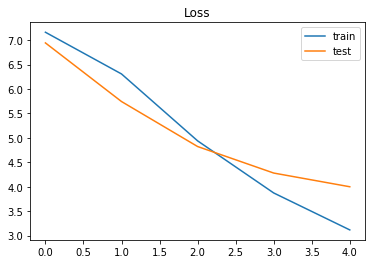

In [54]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

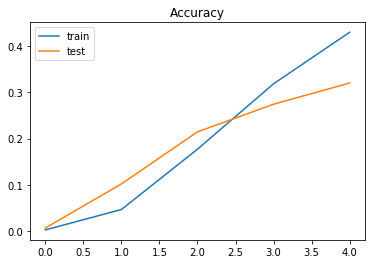

In [55]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();